In [1]:
'''from google.colab import files
uploaded = files.upload()'''

'from google.colab import files\nuploaded = files.upload()'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
netflix_data = pd.read_csv(r'/content/drive/MyDrive/combined_data_1.txt.zip',header = None, names= ['Customer_id', 'Rating'] , usecols=[0,1])
netflix_data.head()

,Customer_id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [5]:
netflix_data.shape

(24058263, 2)

In [6]:
netflix_data.dtypes

,0
Customer_id,object
Rating,float64


In [7]:
# to fin out how many ppl have given rating 1 2 3 4 5 stars like that
stars = netflix_data.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [8]:
stars.shape

(5, 1)

In [9]:
# to find out how manymovies are there in the dataset
movie_count = netflix_data.isnull().sum()
movie_count

,0
Customer_id,0
Rating,4499


In [10]:
# to find out how manymovies are there in the dataset
movie_count = netflix_data.isnull().sum()[1]
movie_count

<ipython-input-10-eb13d57a891b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = netflix_data.isnull().sum()[1]


4499

In [11]:
# customer count with nan values
customer_count = netflix_data['Customer_id'].nunique()
customer_count

475257

In [12]:
# customer count without nan values
customer_count = netflix_data['Customer_id'].nunique() - movie_count
customer_count

470758

In [15]:

rating_count = netflix_data['Customer_id'].count() - movie_count

rating_count

24053764

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

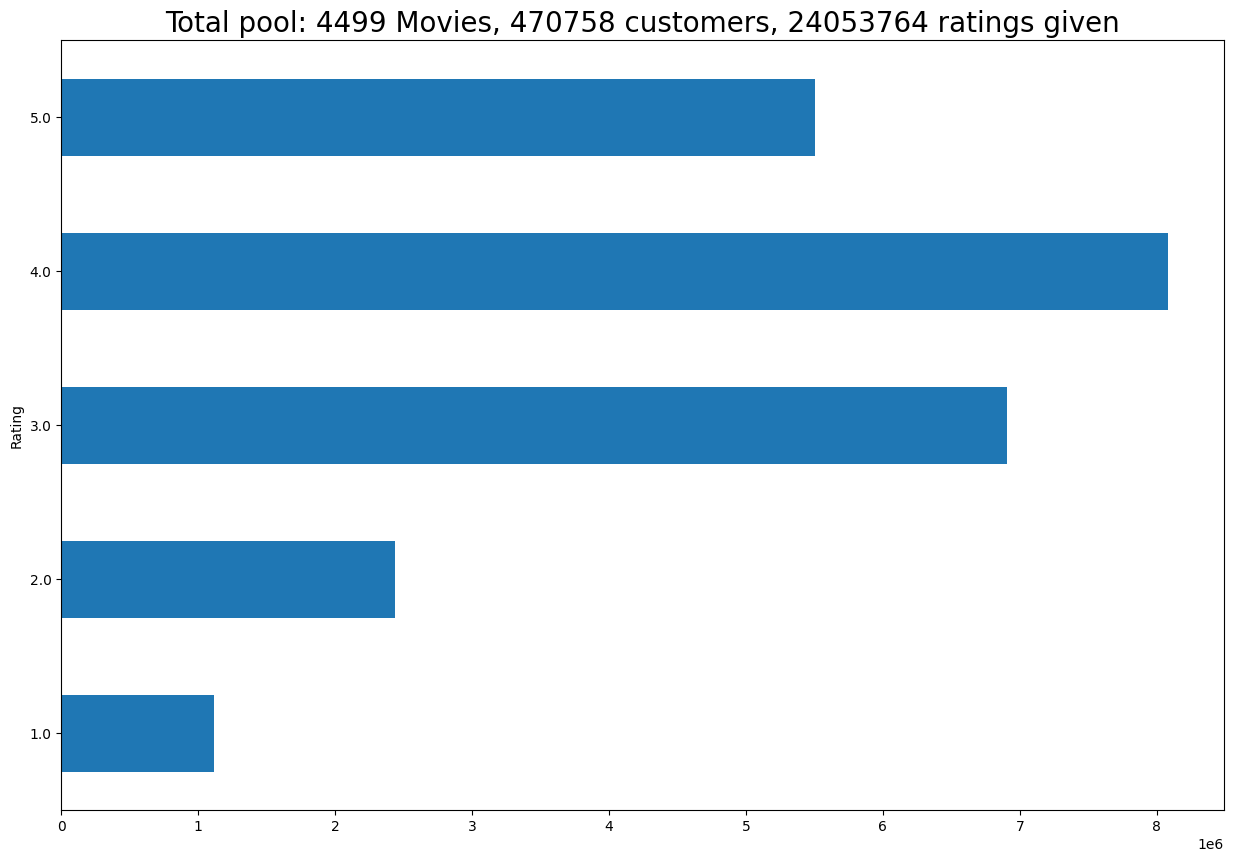

In [22]:
## To plot the distribution of the ratings in as a bar plot
ax = stars.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')


In [23]:

#print--->print data  '' 'Total pool'
# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(netflix_data.Rating))

df_nan.head()
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]

In [24]:

df_nan.shape
# To reset the index of the dataframe
df_nan = df_nan.reset_index()

df_nan.head()
#To create a numpy array containing movie ids according the 'ratings' dataset


,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [25]:

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(netflix_data) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [30]:
#tuple(x)
#To append the above created array to the datset after removing the 'nan' rows
netflix_data = netflix_data[pd.notnull(netflix_data['Rating'])]#movies count so nan
netflix_data['Movie_Id'] = movie_np.astype(int)
netflix_data['Customer_id'] =netflix_data['Customer_id'].astype(int)
print('-Dataset examples-')


<ipython-input-30-182ad09b959c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['Movie_Id'] = movie_np.astype(int)


-Dataset examples-


In [31]:
netflix_data.head()
netflix_data.shape
# Data Cleaning
f = ['count','mean']

In [33]:

#count and mean
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = netflix_data.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = netflix_data.groupby('Customer_id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')


print(f'Original Shape: {netflix_data.shape}')

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0
Original Shape: (24053764, 3)


In [36]:

netflix_data = netflix_data[~netflix_data['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
netflix_data = netflix_data[~netflix_data['Customer_id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(netflix_data.shape))

print('-Data Examples-')
netflix_data.head()
# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId
df_p = pd.pivot_table(netflix_data,values='Rating',index='Customer_id',columns='Movie_Id')

print(df_p.shape)
df_p.head()

After Trim Shape: (17337458, 3)
-Data Examples-
(143458, 1350)


Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Customer_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Import necessary libraries
import pandas as pd

# Read the CSV file, handling potential extra delimiters
df_title = pd.read_csv('movie_titles.csv', encoding="ISO-8859-1", header=None, names=['Movie_Id', 'Year', 'Name'], on_bad_lines='warn')

# Set 'Movie_Id' as the index
df_title.set_index('Movie_Id', inplace=True)

# Display the first 10 rows of the DataFrame
print(df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


<ipython-input-43-782124039fb6>:5: ParserWarning: Skipping line 72: expected 3 fields, saw 4
Skipping line 264: expected 3 fields, saw 5
Skipping line 350: expected 3 fields, saw 4
Skipping line 366: expected 3 fields, saw 4
Skipping line 394: expected 3 fields, saw 4
Skipping line 466: expected 3 fields, saw 4
Skipping line 582: expected 3 fields, saw 4
Skipping line 600: expected 3 fields, saw 4
Skipping line 670: expected 3 fields, saw 4
Skipping line 672: expected 3 fields, saw 4
Skipping line 729: expected 3 fields, saw 4
Skipping line 776: expected 3 fields, saw 4
Skipping line 827: expected 3 fields, saw 4
Skipping line 834: expected 3 fields, saw 4
Skipping line 891: expected 3 fields, saw 4
Skipping line 913: expected 3 fields, saw 4
Skipping line 944: expected 3 fields, saw 4
Skipping line 973: expected 3 fields, saw 4
Skipping line 1010: expected 3 fields, saw 4
Skipping line 1015: expected 3 fields, saw 4
Skipping line 1058: expected 3 fields, saw 4
Skipping line 1095: expe

In [45]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505164 sha256=b05304b8b024e5d3891b4d0e153e64c887f37c586953755d4f091ebd77a054f8
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [48]:
# To install the scikit-surprise library for implementing SVD
### Run the following command in the Anaconda Prompt to install surprise package
#conda install -c conda-forge scikit-surprise
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(netflix_data[['Customer_id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()


In [49]:
# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
netflix_data.head()

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9962  1.0009  0.9940  0.9971  0.0029  
MAE (testset)     0.8005  0.8066  0.8018  0.8029  0.0026  
Fit time          5.26    1.46    1.45    2.73    1.79    
Test time         0.43    0.42    0.18    0.35    0.11    


,Customer_id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [50]:
## To find all the movies rated as 5 stars by user with userId = 712664
dataset_712664 = netflix_data[(netflix_data['Customer_id'] == 712664) & (netflix_data['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

,Name
Movie_Id,
3,Character
79,The Killing
175,Reservoir Dogs
199,The Deer Hunter
241,North by Northwest
256,Ghost Dog: The Way of the Samurai
348,The Last Temptation of Christ
357,House of Sand and Fog
416,Elephant


In [51]:
# Train an SVD to predict ratings for user with userId = 1
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

In [52]:


#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]

In [54]:

# getting full dataset
data = Dataset.load_from_df(netflix_data[['Customer_id', 'Movie_Id', 'Rating']], reader)

In [55]:

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

In [56]:

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

In [57]:

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                          Name  Estimate_Score
711   2003.0                            The Wire: Season 1        5.000000
1984  2004.0                              Samurai Champloo        5.000000
2890  1994.0                                   Hoop Dreams        5.000000
173   1992.0                                Reservoir Dogs        5.000000
4270  2002.0                Curb Your Enthusiasm: Season 3        5.000000
1011  1992.0                                   Hard Boiled        4.988081
762   2003.0                            Foyle's War: Set 2        4.973631
2281  2003.0    The Looney Tunes Golden Collection: Vol. 1        4.921643
857   1954.0                                 Seven Samurai        4.920267
750   2004.0  End of the Century: The Story of the Ramones        4.912101
